# Social Network Analysis - Exercise Sheet 1b)


### Computation of all maximal Cliques for undirected Graphs.

In graph theory cliques, i.e., subsets of the graph such that every two distinct vertices are adjacent, are one of the basic concepts of interest.
The concept has found a lot of applications throughout different disciplines.
For example in social network analysis cliques are used to analyze and model communities and in electrical engineering to analyze the topology of communication networks.
Further there are a lot of applications in bioinformatics and computational chemistry.
A directly connected task is the finding of cliques.
This so called clique problem is computationally hard.
Nonetheless a multitude of algorithms have been developed.
In 1977 Tsukiyama et. al. showed that it is possible to compute all maximal cliques where the amount of time per generated clique is polynomial.

Your Task is to implement their algorithm.

In [1]:
# Execute this cell to show the PDF containing the algorithm or open the PDF seperately
from IPython.display import IFrame
IFrame("./resources/Tsukiyama.pdf", width='100%', height=800)

##### Exercise 1
* Implement the above algorithm and test your implementation with the graphs given below.
* The pseudocode only lists (i.e. prints) the maximal cliques, change the algorithm to return a set containing the maximal cliques.
* Comment your code properly.
* Use Testcase 1 to perform a visual inspection of your results
* Use Testcase 4 to measure the time your implementation needs on different subsets of the [Euroroad](http://konect.uni-koblenz.de/networks/subelj_euroroad) network (graph is provided in the zip file). As a reference: Your implementation should compute the maximal cliques of the biggest subgraph (300 nodes) in under 400 seconds when timing the computation using the cProfile library.

##### Hints
* Submit your code zipped via [moodle](https://moodle.uni-kassel.de/course/view.php?id=11038) until 17.11.2023 23:55 MEZ
* Use the [NetworkX](https://networkx.github.io/documentation/stable/) library.
* Below the Implementation section is a Test section that is used to test your code.

### Implementation
Implement your solution in this section.
Use the predefined methods.
You can add more methods if you want.

In [14]:
import random
import networkx as nx
import matplotlib.pyplot as plt

'''own functions'''
def get_maximal_cliques(vertices: set, vertex: int, G: nx.Graph):
    '''
    :param vertices: set of vertices
    :param vertex: maximal vertex index (= number of vertices checked)
    :param G: undirected graph
    :return: True if vertex is maximal clique in G[j] (j <= i), False otherwise
    '''
    if vertex < 1:  # vertex index starts at 1
        return ValueError("vertex index must be >= 1")
    
    for j in range(1, vertex):
        if (vertex not in vertices) and (vertices in list(G.adj[vertex])):    # subset of neighbours
            return False
        
    return True

def get_parent(vertices: set, vertex: int, G: nx.Graph):
    '''
    :param vertices: set of vertices
    :param vertex: maximal vertex index (= number of vertices checked)
    :param G: undirected graph
    :return: returns first maximal clique in G[j] (j < i) that contains vertices - vertex
    '''
    p_vertices = vertices - {vertex}
    for j in range(1, vertex):
        if p_vertices in list(G.adj[j]):
            p_vertices = p_vertices.union({j})
    return p_vertices

def insert_vertex(vertex: int, clique: set, G: nx.Graph):
    '''
    :param vertex: maximal vertex index (= number of vertices checked)
    :param clique: maximal clique in G[j] (j < vertex)
    :param G: undirected graph
    :return: returns maximal cliques in G[i] that contain vertex
    '''
    if vertex == G.number_of_nodes() + 1:
        return clique   # already maximal clique
    else:
        if clique in list(G.adj[vertex]):
            #  Clique clique in neighbours of vertex
            clique = clique.union({vertex})
            clique = insert_vertex(vertex + 1, clique, G)
            clique = clique - {vertex}
        else:
            # left child
            clique = insert_vertex(vertex + 1, clique, G) 

            # right child
            print(k, type(k), )
            k = clique.intersection({G.adj[vertex]}).union({vertex})
            if get_maximal_cliques(k, vertex, G) and (clique == get_parent(k, vertex, G)):
                clique = k
                clique = insert_vertex(vertex + 1, clique, G)
                clique = get_parent(clique, vertex, G)
    return clique



'''predefined functions'''

def all_maximal_cliques(undirected_graph):
    '''
    Input: undirected Graph
    Output: set containing all maximal 
    '''   
    print("Graph: ", undirected_graph.nodes, undirected_graph.edges)

    C = {}
    C = insert_vertex(vertex=1, clique=C, G=undirected_graph)
    
    return 



### Tests 
This section contains four testcases that can be used to test if the implemented methods correctly compute the maximal cliques.
Further it contains code to draw the graphs and inspect them visually given the NetworkX library was used.

In [12]:
def inspect_cliques_visually(G, plotall=False):
    nx.draw(G, node_color='lightblue', with_labels = True)
    plt.show()
    max_cliques = all_maximal_cliques(G)
    print('maximal cliques:',*[set(c) for c in max_cliques])
    if plotall:
        for clique in max_cliques:
            val_map = {c:'yellow' for c in clique}
            values = [val_map.get(node, 'lightblue') for node in G.nodes()]
            nx.draw(G, node_color=values, with_labels = True)
            plt.show()

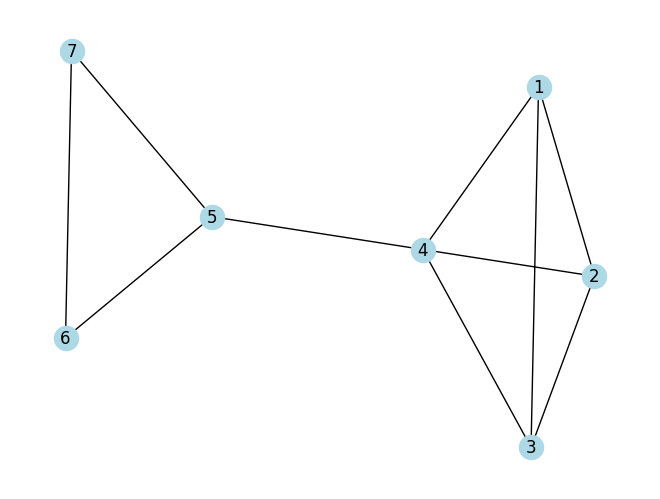

Graph:  [1, 2, 3, 4, 5, 6, 7] [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (4, 5), (5, 6), (5, 7), (6, 7)]


AttributeError: 'dict' object has no attribute 'intersection'

In [15]:
# Testcase 1
G1 = nx.Graph()
G1.add_nodes_from([1,2,3,4,5,6,7])
G1.add_edges_from([(1,2),(1,3),(1,4),(2,3),(2,4),(3,4),(4,5),(5,6),(5,7),(6,7)])

inspect_cliques_visually(G1,plotall=True)

In [ ]:
# Testcase 2
G2 = nx.Graph()
G2.add_nodes_from([1,2,3,4,5,6,7])
G2.add_edges_from([(1,2),(1,3),(1,4),(2,3),(4,5),(4,6),(4,7),(5,6),(5,7),(6,7)])
inspect_cliques_visually(G2)

In [ ]:
# Testcase 3 
G3 = nx.read_gml('./resources/adjnoun.gml', label='id')
all_maximal_cliques(G3)

In [ ]:
# Testcase 4
G4 = nx.read_adjlist("./resources/out.subelj_euroroad_euroroad", comments='%',nodetype=int)
G4_sub1 = G4.subgraph(range(1,100))
G4_sub2 = G4.subgraph(range(1,200))
G4_sub3 = G4.subgraph(range(1,300))
import cProfile
cProfile.run('all_maximal_cliques(G4_sub1)')
cProfile.run('all_maximal_cliques(G4_sub2)')
cProfile.run('all_maximal_cliques(G4_sub3)')